## Numerical example

Here I use the numerical example in the Appendix of [Wallace & Capitaine A&A 459, 981-985 (2006)](https://ui.adsabs.harvard.edu/link_gateway/2006A&A...459..981W/doi:10.1051/0004-6361:20065897). 

Time: UTC 2006 January 15, 21h 24m 37.5s.

At this time, $\Delta$(AT) = TAI - UTC = 33 s, so TT - UTC = 32.184 s + 33 s = 65.184 s. Hence

TT = 2006 January 15, 21h 25m 42.684s and 

${\rm JD_{TT}}$ = 2453750.5 + 0.8928551388888889

Also, UT1 - UTC = 0.3341 s, which means 

UT1 = 2006 January 15, 21h 24m 37.8341s and 

${\rm JD_{UT1}}$ = 2453750.5 + 0.8921045613425925

Let's use the values of ${\rm JD_{TT}}$ and ${\rm JD_{UT1}}$ to calculate the CIO locator $s$, equation of origin $E_o$, earth rotation angle ERA and Green apparent sidereal time GAST, and then compare the values to the ones given by the paper.

$s$ can be computed by the function `s_Vondrak_IAU2000A_spline(jd0_tt, jd1_tt)`;

$E_o$ can be computed by the function `Eo_Vondrak_IAU2000A_spline(jd0_tt, jd1_tt)`;

ERA can be computed by the function `ERA_from_UT1(jd0_ut1, jd1_ut1)`;

GAST can be computed by GAST = ERA - Eo

In [1]:
from s_Vondrak_IAU2000A_spline import s_Vondrak_IAU2000A_spline
from Eo_Vondrak_IAU2000A_spline import Eo_Vondrak_IAU2000A_spline
from ERA_GAST import ERA_from_UT1

jd0_ut1 = 2453750.5; jd1_ut1 = 0.8921045613425925;
jd0_tt = 2453750.5; jd1_tt = 0.8928551388888889;

s = s_Vondrak_IAU2000A_spline(jd0_tt, jd1_tt)
Eo = Eo_Vondrak_IAU2000A_spline(jd0_tt, jd1_tt)
ERA = ERA_from_UT1(jd0_ut1, jd1_ut1)
GAST = ERA - Eo

All angles are in radians. To compare with the values given by the paper, we need to convert $s$ and $E_o$ to arcseconds, and ERA and GAST to the form `hh`h `mm`m `ss.xxxxxxx`s.

The conversion from radians to arcseconds is trivial. The following is a helper function that converts radians to a string of the form `hh`h `mm`m `ss.xxxxxxx`s.

In [2]:
import numpy as np

def rad_to_hms(x):
    x *= 12/np.pi
    x -= 24*np.floor(x/24)
    h = int(x)
    m = int(60*(x - h))
    s = 3600*(x - h - m/60.0)
    h = ('0'+str(h))[-2:]
    m = ('0'+str(m))[-2:]
    s = '0'+str(s) if s < 10 else str(s)
    return h + 'h ' + m + 'm ' + s + 's'

In [3]:
r2s = 648000/np.pi # radian to arcsecond
print('s = {}"'.format(s*r2s))
print('EO = {}"'.format(Eo*r2s))
print('ERA = {}'.format(rad_to_hms(ERA)))
print('GAST = {}'.format(rad_to_hms(GAST)))

s = -0.002604958535686047"
EO = -277.64713882168184"
ERA = 05h 05m 03.7034528451833806s
GAST = 05h 05m 22.213262099959525s


Here are the values given by Wallace and Capitaine's paper:

s = -0.002571986"

EO = -277.646995746"

ERA = 05h 05m 03.703452845

GAST = 05h 05m 22.213252562s

From these we can calculate the errors of our formulas:

$\delta s$ = 0.033 milliarcseconds (mas), $\delta E_o$ = 0.14 mas and $\delta$GAST = -9.5 microseconds.

Note that our ERA is exactly the same as the value given by the paper. This is not surprising since they are both computed from the definition of UT1.

Note also that the paper's calculations are based on the IAU2006/2000A precession-nutation model, whereas out formulas are for the Vondrak et al/IAU2000A model. However, the two models differ by less than 0.04 microarcsecond ($\mu$as) within a century from 2000, as shown in [Table 1 here](http://ytliu.epizy.com/eclipse/Eo.html#tab_P03_Vondrak_comp). The methods used in the paper are accurate to $\mu$as order. Hence the deviations reported here reflect the errors of our formulas, which are of sub-mas order in this example.


## Graphs of *s* and *Eo* in 2025

In the following I show plots of $s$ and $E_o$ in 2025, corresponding to Julian dates between 2460676.5 and 2461040.5. 

In [4]:
jd0 = np.arange(2460676, 2461041)
d = jd0 - 2460676
s = [s_Vondrak_IAU2000A_spline(x, 0.5)*r2s for x in jd0]
Eo = [Eo_Vondrak_IAU2000A_spline(x, 0.5)*r2s for x in jd0]

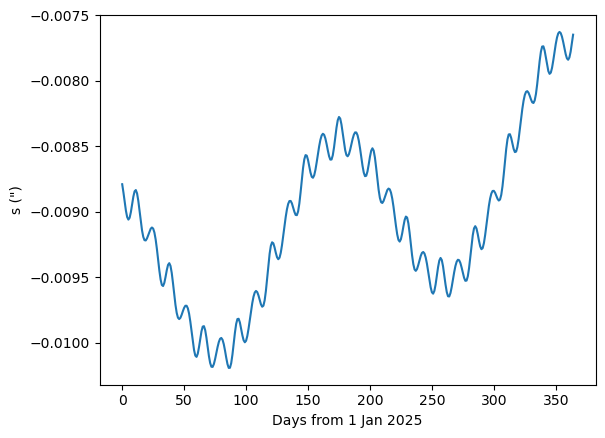

In [5]:
# plot s
import matplotlib.pyplot as plt
plt.plot(d, s)
plt.xlabel('Days from 1 Jan 2025')
plt.ylabel('s (")')
plt.show()

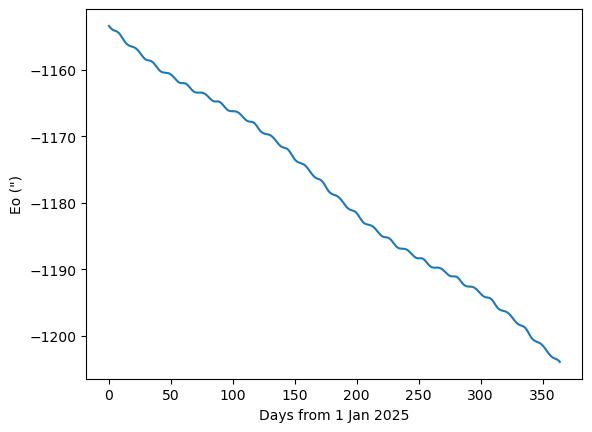

In [6]:
# plot Eo
plt.plot(d, Eo)
plt.xlabel('Days from 1 Jan 2025')
plt.ylabel('Eo (")')
plt.show()


## Graphs of *s* and *Eo* over 400 millennia

The spline formulas are only valid for years from -4000 to 8000, or $|T| \leq 60$, where $T = ({\rm JD} - 2451545)/36525$ is the Julian century from J2000. The functions `s_Vondrak_longT(jd0, jd1)` and `Eo_Vondrak_longT(jd0, jd1)` can be used to calculate $s$ and $E_o$ for $|T| < 2000$, covering a time span of 400 millennia. When $|T| \leq 59.8$, the functions return the same values as those by the spline formulas. When $|T| \geq 60$, they ignore nutation in the calculation. In the transition regions $59.8 < |T| < 60$, weighted averages of the spline and long-time formulas are used to ensure smooth transition. 

To simplify the calculations, I vectorize the functions `s_Vondrak_longT` and `Eo_Vondrak_longT` instead of using list comprehension.

In [7]:
from s_Vondrak_longT import s_Vondrak_longT
from Eo_Vondrak_longT import Eo_Vondrak_longT

T = np.arange(-2000, 2001)
jd0 = 2451545 + T*36525
s_Vondrak_longT_vec = np.vectorize(s_Vondrak_longT)
Eo_Vondrak_longT_vec = np.vectorize(Eo_Vondrak_longT)
s = s_Vondrak_longT_vec(jd0, 0)*r2s/3600
Eo = Eo_Vondrak_longT_vec(jd0, 0)*r2s/3600

The function `Eo_Vondrak_longT()` returns *Eo* in the range \[-pi,pi). For plotting purpose, it's better to expand *Eo* outside the range to make it continuous in the entire range. I also want to make *Eo* in the range (-180°, 180°) at J2000. The following commands can achieve these goals.

In [8]:
mod360 = lambda x: x - 360*np.floor(x/360 + 0.5)
for i in range(1,len(Eo)):
    Eo[i] = Eo[i-1] + mod360(Eo[i] - Eo[i-1])
Eo += mod360(Eo[T==0]) - Eo[T==0]

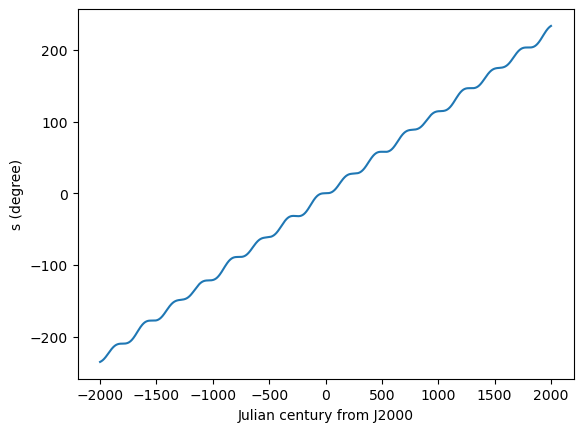

In [9]:
# plot s
plt.plot(T, s)
plt.xlabel('Julian century from J2000')
plt.ylabel('s (degree)')
plt.show()

We see that the secular behavior of $s$ is to increase linearly with time. To see the variation from linearity, we can fit a line and then subtract off the slope.

In [10]:
# Fit a line
from scipy import optimize
popt, pcov = optimize.curve_fit(lambda x,m,b: m*x+b, T, s)
print(popt)

[ 0.11476933 -1.46204851]


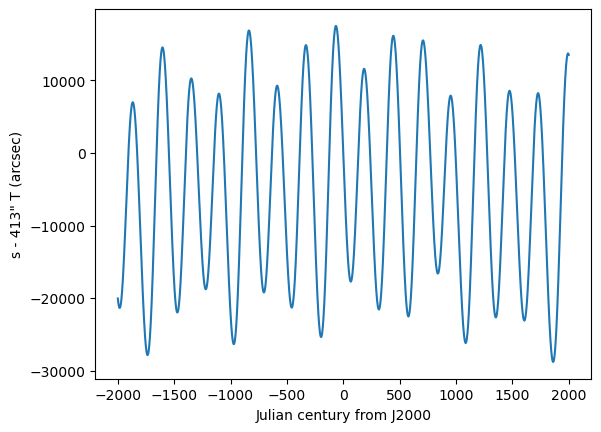

In [11]:
# remove the slope
plt.plot(T, (s - popt[0]*T)*3600)
plt.xlabel('Julian century from J2000')
plt.ylabel('s - '+str(round(popt[0]*3600))+'" T (arcsec)')
plt.show()

This is similar to Figure 10 in [Vondrák, Capitaine & Wallace A&A 534, A22 (2011)](https://ui.adsabs.harvard.edu/link_gateway/2011A&A...534A..22V/doi:10.1051/0004-6361/201117274), except that there is a sign error in their equation (26), resulting in their curve being upside down. (Wallace, Capitaine & Vondrák, private communication, July 2025).

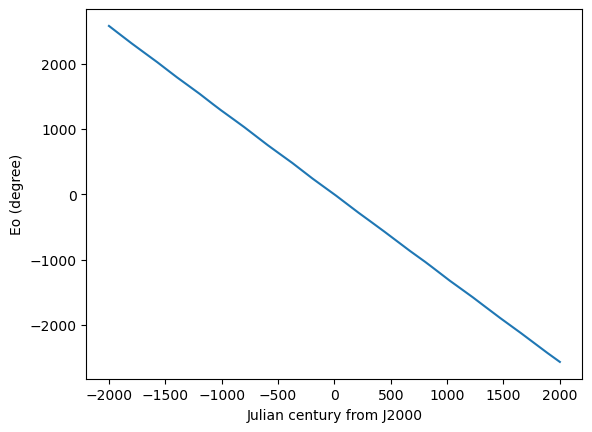

In [12]:
# plot Eo
plt.plot(T, Eo)
plt.xlabel('Julian century from J2000')
plt.ylabel('Eo (degree)')
plt.show()

To see the variation from linearity, we fit a line and then subtract off the slope.

In [13]:
# Fit a line
popt, pcov = optimize.curve_fit(lambda x,m,b: m*x+b, T, Eo)
print(popt)

[-1.28622998 -0.73601118]


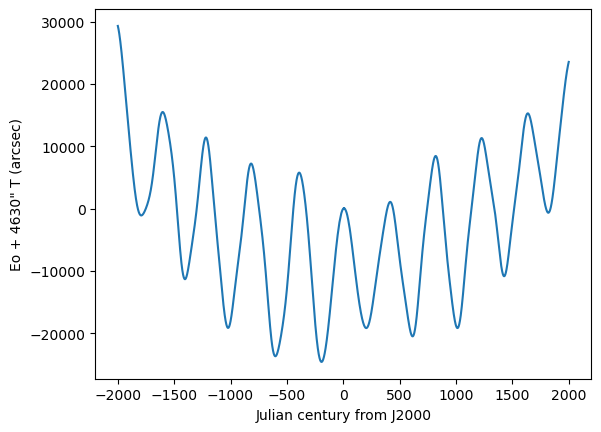

In [14]:
# remove the slope
plt.plot(T, (Eo - popt[0]*T)*3600)
plt.xlabel('Julian century from J2000')
plt.ylabel('Eo + '+str(round(-popt[0]*3600))+'" T (arcsec)')
plt.show()